In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("tolgadincer/labeled-chest-xray-images")

print("Path to dataset files:", path)

/usr/local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: /kaggle/input/labeled-chest-xray-images


In [3]:
!pip install torch torchvision transformers datasets


[notice] A new release of pip is available: 23.0.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [4]:
pip install MedCLIP

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 11.0 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.5/26.5 MB 41.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 624.3/624.3 kB 40.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.7/61.7 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 12.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 37.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.5/73.5 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.7 MB/s eta 0:00:00
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9685 sha256=e5ff6f3684131dc5f83844c7fdd9d8c6c7ad827

In [5]:
!pip install open_clip_torch==2.23.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 6.4 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 26.9 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 4.4 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [6]:
import torch
from urllib.request import urlopen
from PIL import Image
from open_clip import create_model_from_pretrained, get_tokenizer

# Load the model and config files from the Hugging Face Hub
model, preprocess = create_model_from_pretrained('hf-hub:microsoft/BiomedCLIP-PubMedBERT_256-vit_base_patch16_224')
tokenizer = get_tokenizer('hf-hub:microsoft/BiomedCLIP-PubMedBERT_256-vit_base_patch16_224')

/usr/local/lib/python3.10/site-packages/torch_xla/__init__.py:253: UserWarning: `tensorflow` can conflict with `torch-xla`. Prefer `tensorflow-cpu` when using PyTorch/XLA. To silence this warning, `pip uninstall -y tensorflow && pip install tensorflow-cpu`. If you are in a notebook environment such as Colab or Kaggle, restart your notebook runtime afterwards.
  warnings.warn(
/usr/local/lib/python3.10/site-packages/timm/models/layers/__init__.py:48: FutureWarning: Importing from timm.models.layers is deprecated, please import via timm.layers
  warnings.warn(f"Importing from {__name__} is deprecated, please import via timm.layers", FutureWarning)
E0000 00:00:1741406503.014196      10 common_lib.cc:612] Could not set metric server port: INVALID_ARGUMENT: Could not find SliceBuilder port 8471 in any of the 0 ports provided in `tpu_process_addresses`="local"
=== Source Location Trace: === 
learning/45eac/tfrc/runtime/common_lib.cc:230
/usr/local/lib/python3.10/site-packages/open_clip/facto

In [ ]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Define data augmentations for training set
train_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(p=0.5),  
    transforms.RandomRotation(degrees=10),  
    transforms.ColorJitter(brightness=0.2, contrast=0.2),  
    transforms.RandomAffine(degrees=0, translate=(0.1, 0.1)),  
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5]) 
])

# Define transform for test dataset 
test_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5])
])

# Load datasets with transformations
train_dataset = datasets.ImageFolder(
    root='/kaggle/input/labeled-chest-xray-images/chest_xray/train',
    transform=train_transform
)
test_dataset = datasets.ImageFolder(
    root="/kaggle/input/labeled-chest-xray-images/chest_xray/test",
    transform=test_transform
)

# Create DataLoaders
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

# Class names
class_labels = train_dataset.classes  # ['normal', 'pneumonia']
print(class_labels)

['NORMAL', 'PNEUMONIA']


In [11]:
# Convert class labels into text descriptions
text_inputs = tokenizer([
    "A chest X-ray showing a normal lung",
    "A chest X-ray showing pneumonia"
])

In [12]:
from collections import Counter

# Assuming your test dataset is a PyTorch dataset
train_labels = [label for _, label in train_dataset]  # Extract labels from training dataset
test_labels = [label for _, label in test_dataset]  # Extract labels from test dataset

# Count occurrences of each class
train_counts = Counter(train_labels)
test_counts = Counter(test_labels)

print(f"Train Class Distribution: {train_counts}")
print(f"Test Class Distribution: {test_counts}")

Train Class Distribution: Counter({1: 3883, 0: 1349})
Test Class Distribution: Counter({1: 390, 0: 234})


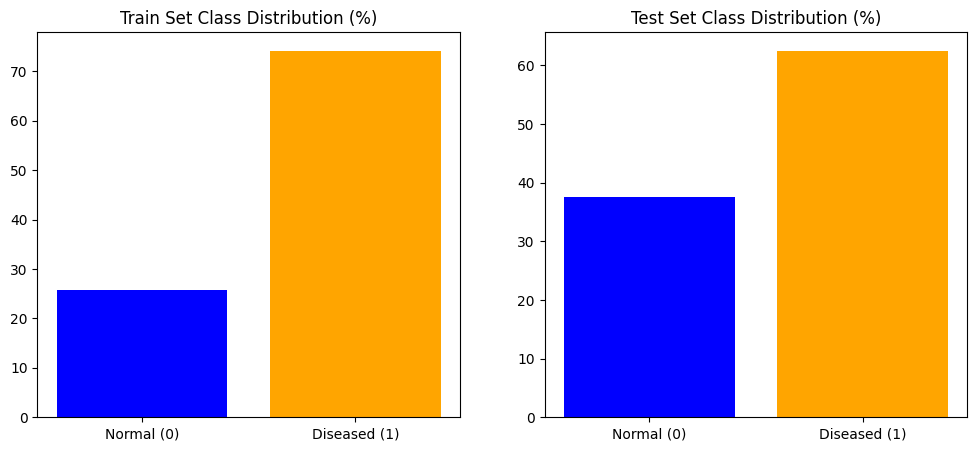

In [13]:
import matplotlib.pyplot as plt

# Convert to percentages
train_total = sum(train_counts.values())
test_total = sum(test_counts.values())

train_percentages = {k: v / train_total * 100 for k, v in train_counts.items()}
test_percentages = {k: v / test_total * 100 for k, v in test_counts.items()}

# Plot
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].bar(train_percentages.keys(), train_percentages.values(), color=["blue", "orange"])
axes[0].set_title("Train Set Class Distribution (%)")
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(["Normal (0)", "Diseased (1)"])

axes[1].bar(test_percentages.keys(), test_percentages.values(), color=["blue", "orange"])
axes[1].set_title("Test Set Class Distribution (%)")
axes[1].set_xticks([0, 1])
axes[1].set_xticklabels(["Normal (0)", "Diseased (1)"])

plt.show()

In [14]:
from torch.utils.data import WeightedRandomSampler

# Compute sample weights
sample_weights = [1.0 / train_counts[label] for _, label in train_dataset]
sampler = WeightedRandomSampler(sample_weights, num_samples=len(train_dataset), replacement=True)

# Use in DataLoader
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=32, sampler=sampler)

In [15]:
from collections import Counter

label_counts = Counter()
for _, labels in train_loader:
    label_counts.update(labels.tolist())

print("Sampled Batch Class Distribution:", label_counts)

Sampled Batch Class Distribution: Counter({1: 2617, 0: 2615})


In [16]:
# Move model to GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

def classify_images(model, dataloader, class_labels):
    model.eval()  # Set model to evaluation mode

    correct = 0
    total = 0

    with torch.no_grad():
        for images, labels in dataloader:
            images = images.to(device)  # Move images to GPU if available

            # Extract image embeddings
            image_features = model.encode_image(images)

            # Extract text embeddings
            text_features = model.encode_text(text_inputs.to(device))

            # Normalize features
            image_features /= image_features.norm(dim=-1, keepdim=True)
            text_features /= text_features.norm(dim=-1, keepdim=True)

            # Compute similarity scores
            similarity = (image_features @ text_features.T).softmax(dim=-1)

            # Get predicted labels
            predictions = similarity.argmax(dim=-1).cpu().numpy()

            correct += (predictions == labels.numpy()).sum()
            total += labels.size(0)

    accuracy = correct / total
    print(f"Classification Accuracy: {accuracy * 100:.2f}%")

# Run classification on test set
classify_images(model, test_loader, class_labels)


Classification Accuracy: 86.54%


In [18]:
import torch
import torch.nn as nn

class MedCLIPClassifier(nn.Module):
    def __init__(self, medclip_model, num_classes=2):
        super(MedCLIPClassifier, self).__init__()

        # Extract the visual encoder from MedCLIP
        self.image_encoder = medclip_model.visual

        # Move dummy input to the same device as the model
        sample_input = torch.randn(1, 3, 224, 224).to(next(medclip_model.parameters()).device)

        # Get feature dimension dynamically
        with torch.no_grad():
            sample_features = self.image_encoder(sample_input)

        feature_dim = sample_features.shape[-1]

        # Add classification head
        self.classifier = nn.Linear(feature_dim, num_classes)

    def forward(self, images):
        image_features = self.image_encoder(images)
        return self.classifier(image_features)

# Move MedCLIP model to the correct device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Initialize the classifier
num_classes = 2  # Normal and Pneumonia
classifier_model = MedCLIPClassifier(model, num_classes)
classifier_model.to(device)  # Move classifier to the same device

MedCLIPClassifier(
  (image_encoder): TimmModel(
    (trunk): VisionTransformer(
      (patch_embed): PatchEmbed(
        (proj): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
        (norm): Identity()
      )
      (pos_drop): Dropout(p=0.0, inplace=False)
      (patch_drop): Identity()
      (norm_pre): Identity()
      (blocks): Sequential(
        (0): Block(
          (norm1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
          (attn): Attention(
            (qkv): Linear(in_features=768, out_features=2304, bias=True)
            (q_norm): Identity()
            (k_norm): Identity()
            (attn_drop): Dropout(p=0.0, inplace=False)
            (proj): Linear(in_features=768, out_features=768, bias=True)
            (proj_drop): Dropout(p=0.0, inplace=False)
          )
          (ls1): Identity()
          (drop_path1): Identity()
          (norm2): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
          (mlp): Mlp(
            (fc1): Linear(in_fe

In [20]:
import torch.optim as optim
import torch
import torch.nn as nn
# Define loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(classifier_model.parameters(), lr=1e-4)

In [21]:
def train_model(model, train_loader, num_epochs=5):
    model.train()  # Set model to training mode

    for epoch in range(num_epochs):
        running_loss = 0.0
        correct = 0
        total = 0

        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)

            optimizer.zero_grad()  # Clear previous gradients
            outputs = model(images)  # Forward pass
            loss = criterion(outputs, labels)  # Compute loss

            loss.backward()  # Backpropagation
            optimizer.step()  # Update weights

            running_loss += loss.item()
            correct += (outputs.argmax(dim=1) == labels).sum().item()
            total += labels.size(0)

        accuracy = 100 * correct / total
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}, Accuracy: {accuracy:.2f}%")

# Train the classifier
train_model(classifier_model, train_loader, num_epochs=5)

Epoch [1/5], Loss: 0.2741, Accuracy: 90.04%
Epoch [2/5], Loss: 0.1209, Accuracy: 95.36%
Epoch [3/5], Loss: 0.1024, Accuracy: 96.29%
Epoch [4/5], Loss: 0.1159, Accuracy: 96.04%
Epoch [5/5], Loss: 0.0681, Accuracy: 97.40%


In [22]:
def evaluate_model(model, test_loader):
    model.eval()  # Set model to evaluation mode

    correct = 0
    total = 0

    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            predictions = outputs.argmax(dim=1)

            correct += (predictions == labels).sum().item()
            total += labels.size(0)

    accuracy = 100 * correct / total
    print(f"Test Accuracy: {accuracy:.2f}%")

# Evaluate the model
evaluate_model(classifier_model, test_loader)

Test Accuracy: 94.87%


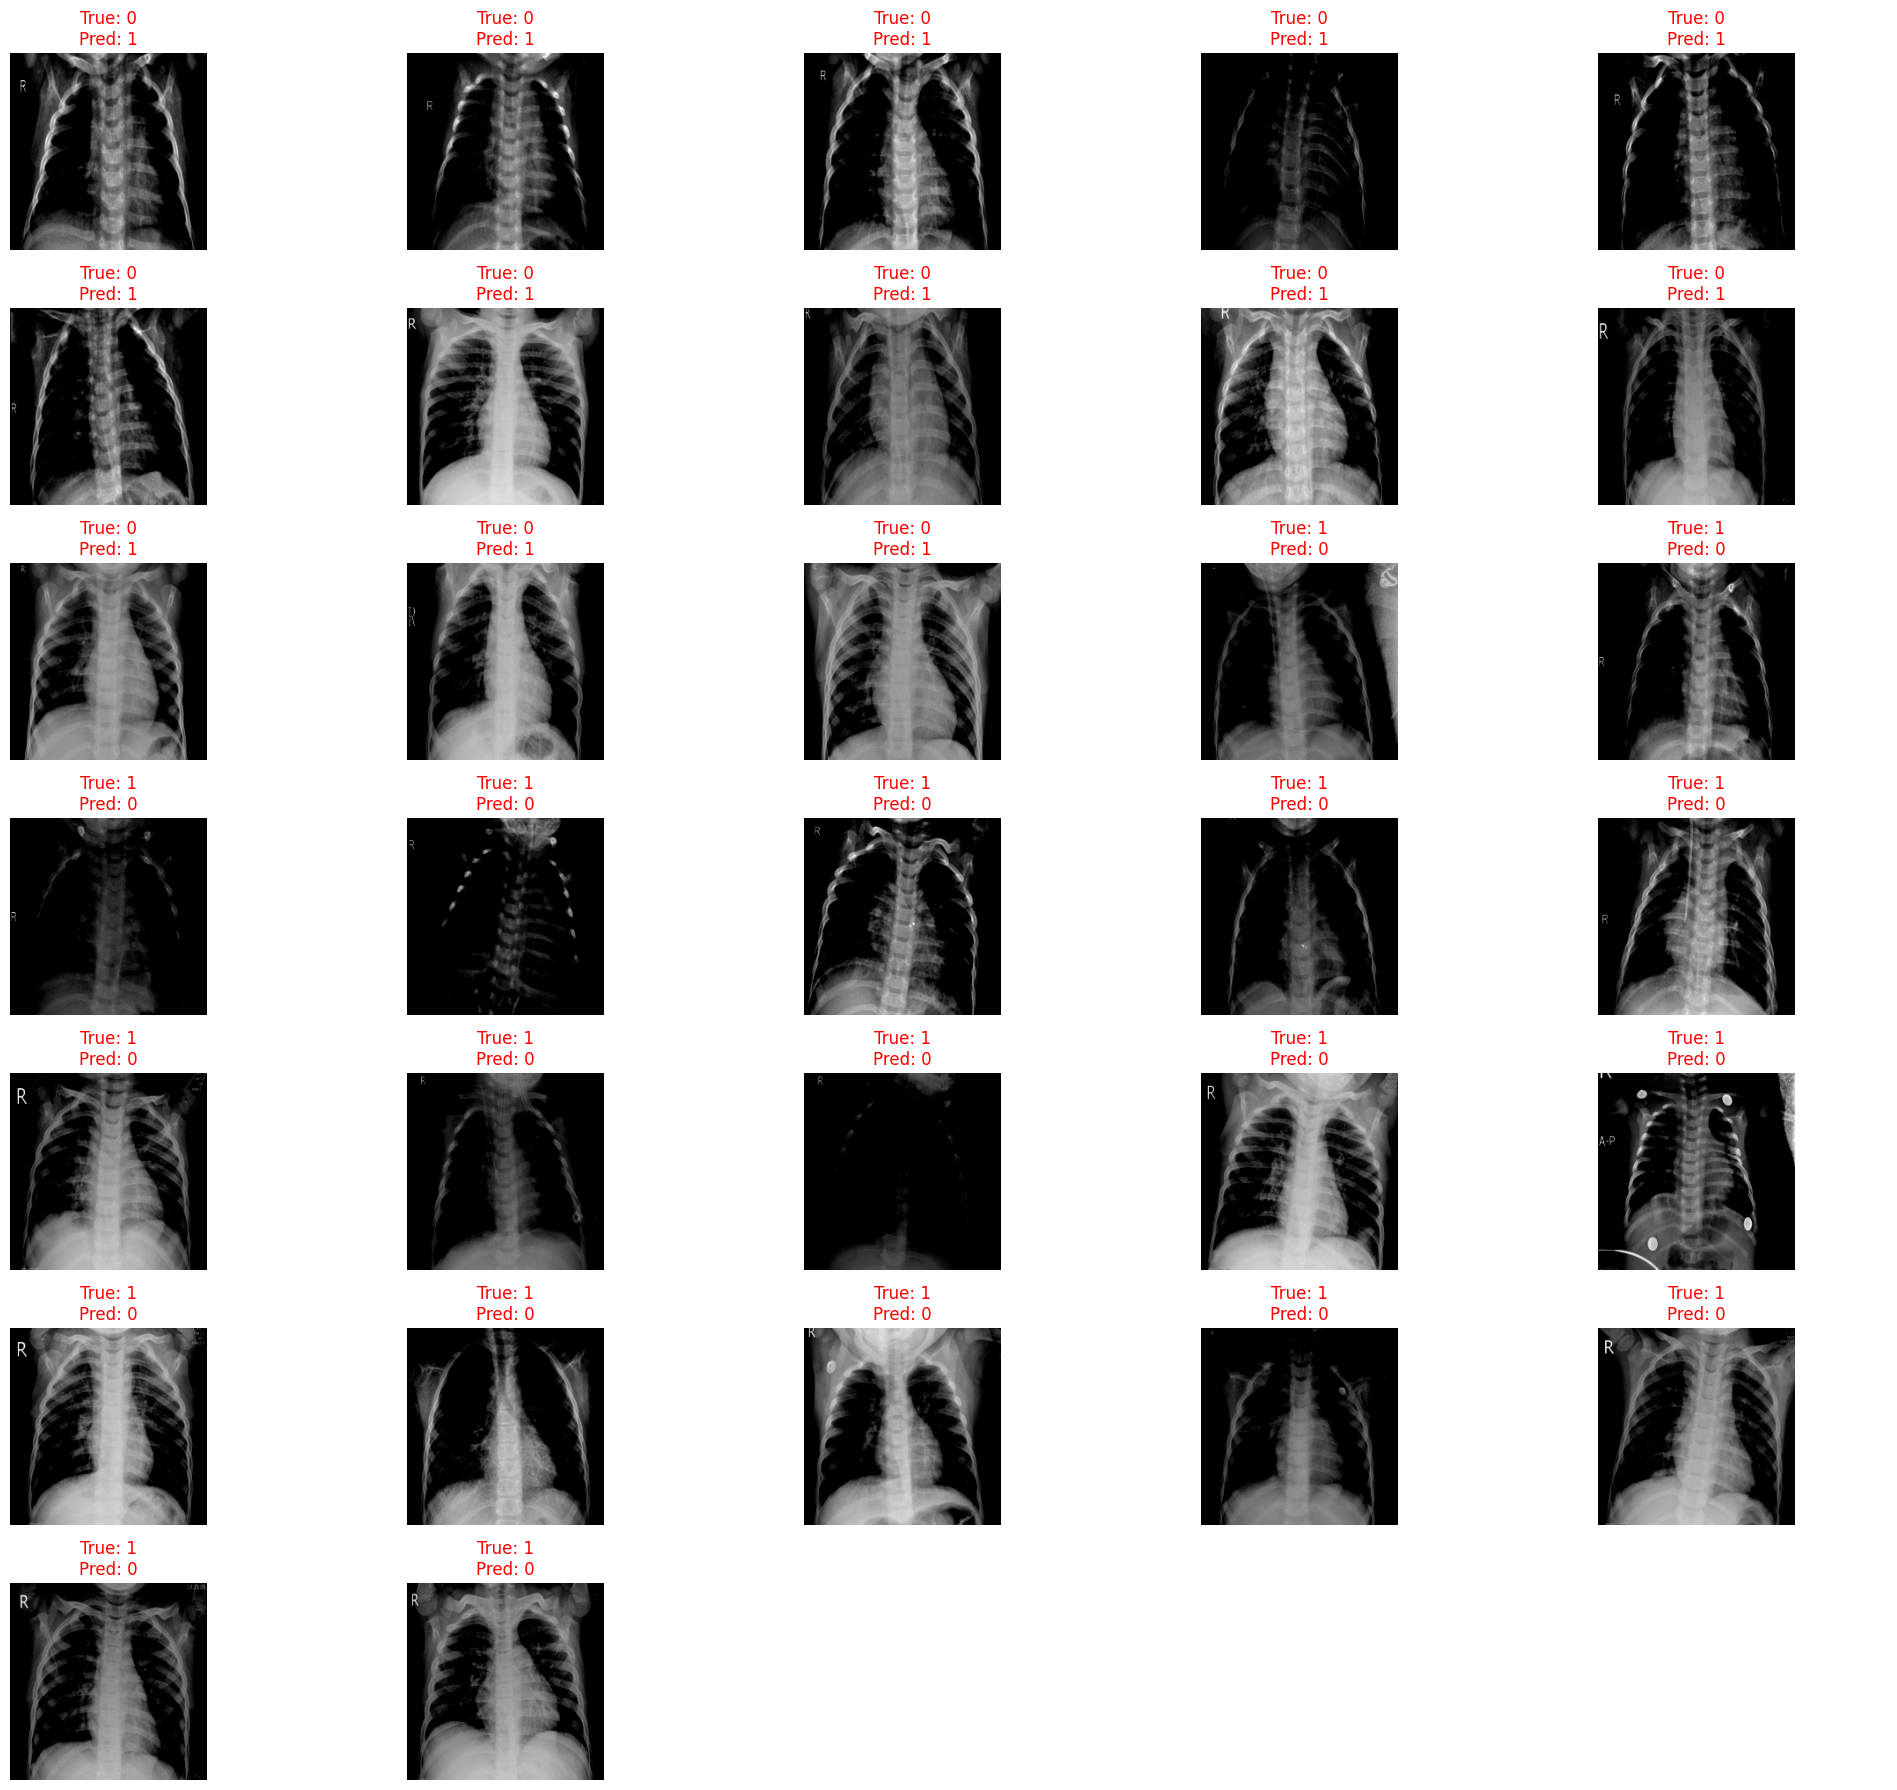

In [23]:
import matplotlib.pyplot as plt
import numpy as np
import torch

# Store incorrect predictions
incorrect_images = []
incorrect_true_labels = []
incorrect_pred_labels = []

# Evaluate the model and collect incorrect predictions
classifier_model.eval()
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)

        outputs = classifier_model(images)
        _, preds = torch.max(outputs, 1)

        # Identify incorrect predictions
        incorrect_indices = (preds != labels).nonzero(as_tuple=True)[0]

        for idx in incorrect_indices:
            incorrect_images.append(images[idx].cpu().numpy().transpose((1, 2, 0)))  # Convert (C, H, W) -> (H, W, C)
            incorrect_true_labels.append(labels[idx].cpu().item())
            incorrect_pred_labels.append(preds[idx].cpu().item())

# If no incorrect predictions exist, print a message
if not incorrect_images:
    print("No incorrect predictions in the entire test set!")
else:
    # Plot incorrect images
    num_images = len(incorrect_images)
    rows = (num_images // 5) + 1  # Adjust number of rows dynamically

    fig, axes = plt.subplots(rows, min(5, num_images), figsize=(20,18))

    # Ensure axes is always iterable
    axes = axes.flatten() if num_images > 1 else [axes]

    for i in range(num_images):
        if i >= len(axes):  # Avoid errors if fewer incorrect images than subplots
            break
        ax = axes[i]
        ax.imshow(incorrect_images[i])
        ax.axis("off")
        ax.set_title(f"True: {incorrect_true_labels[i]}\nPred: {incorrect_pred_labels[i]}", color="red")

    # Hide any unused subplots
    for j in range(i + 1, len(axes)):
        axes[j].axis("off")

    plt.tight_layout()
    plt.show()
